In [1]:
# Download Images
!wget "https://images.unsplash.com/photo-1578133630261-a79a92922335?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1000&q=80"
!wget "https://images.unsplash.com/photo-1514924013411-cbf25faa35bb?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1000&q=80"

# Load the image from your Colab environment
street = "/content/photo-1514924013411-cbf25faa35bb?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1000&q=80"
dog = "/content/photo-1578133630261-a79a92922335?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1000&q=80"

--2023-09-03 13:59:56--  https://images.unsplash.com/photo-1578133630261-a79a92922335?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1000&q=80
Resolving images.unsplash.com (images.unsplash.com)... 199.232.34.208, 2a04:4e42:45::720
Connecting to images.unsplash.com (images.unsplash.com)|199.232.34.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170716 (167K) [image/jpeg]
Saving to: ‘photo-1578133630261-a79a92922335?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1000&q=80.8’

photo-1578133630261 100%[===================>] 166.71K  --.-KB/s    in 0.02s   

2023-09-03 13:59:56 (6.93 MB/s) - ‘photo-1578133630261-a79a92922335?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1000&q=80.8’ saved [170716/170716]

--2023-09-03 13:59:56--  https://images.unsplash.com/photo-1514924013411-cbf25faa35bb?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1000&q=80
Resolving images.unsplash.com (images.unsplash.

In [2]:
# Libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

Q1. On the below given images add the following types of noise:
1. Salt and pepper noise
2. Gaussian noise
Display the images with noise and explain the difference between these two noisy images.
Then remove those noise using any filter and also write the functioning of the filter.

In [3]:
# Function to add salt and pepper noise
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = image.copy()
    total_pixels = image.size

    salt_pixels = int(total_pixels * salt_prob) # percentage of pixel to be replaced white dots
    salt_coordinates = [np.random.randint(0, i - 1, salt_pixels) for i in image.shape] # randomly selecting the pixels
    noisy_image[salt_coordinates[0], salt_coordinates[1]] = 1 # white pixels

    pepper_pixels = int(total_pixels * pepper_prob) # percentage of pixel to be replaced black dots
    pepper_coordinates = [np.random.randint(0, i - 1, pepper_pixels) for i in image.shape] # randomly selecting the pixels
    noisy_image[pepper_coordinates[0], pepper_coordinates[1]] = 0  # black pixels

    return noisy_image

# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, sigma=15):
    noisy_image = image.copy()
    noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8) # gaussian noise mean/std provided
    noisy_image = cv2.add(image, noise)
    return noisy_image

# Function to remove noise using a filter (e.g., Gaussian blur or Median filter)
def remove_noise(image, filter_type, kernel_size=5):
    if filter_type == 'gaussian':
        return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    elif filter_type == 'median':
        return cv2.medianBlur(image, kernel_size)
    else:
        return image

def kernal_serach(salt_and_pepper_noisy_image,gaussian_noisy_image,image):
  # Getting the best kernal size
  # Initialize lists to store the values of i, loss_salt_and_pepper, and loss_gaussian
  i_values = []
  loss_salt_and_pepper_values = []
  loss_gaussian_values = []

  for i in range(1,18,2):
      # Remove noise using filters
      filtered_salt_and_pepper = remove_noise(salt_and_pepper_noisy_image, filter_type='median', kernel_size=i)
      filtered_gaussian = remove_noise(gaussian_noisy_image, filter_type='gaussian', kernel_size=i)

      # Loss function to get the best kernel size
      loss_salt_and_pepper = cv2.subtract(image, filtered_salt_and_pepper)
      loss_gaussian = cv2.subtract(image, filtered_gaussian)

      # Append the values to the lists
      i_values.append(i)
      loss_salt_and_pepper_values.append(np.sum(loss_salt_and_pepper))
      loss_gaussian_values.append(np.sum(loss_gaussian))

  # Plot the graphs
  print('Kernal size v/s image pixel loss graph')
  plt.plot(i_values, loss_salt_and_pepper_values, label='Salt and Pepper')
  plt.plot(i_values, loss_gaussian_values, label='Gaussian')
  plt.xlabel('Kernel Size')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  return i_values[loss_salt_and_pepper_values.index(min(loss_salt_and_pepper_values))]

Kernal size v/s image pixel loss graph


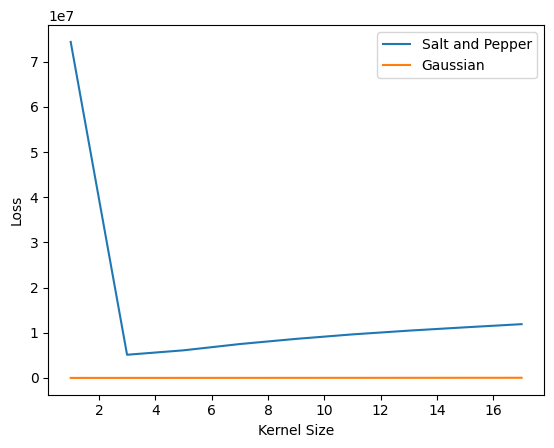

Raw image


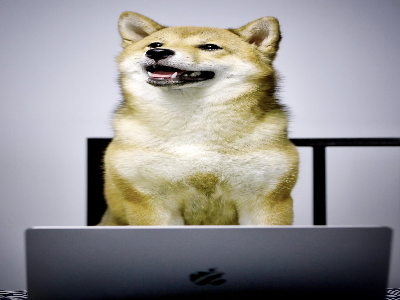

salt_and_pepper_noisy_image


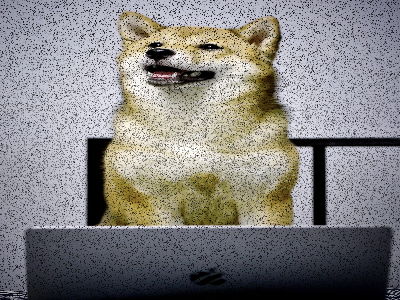

gaussian_noisy_image


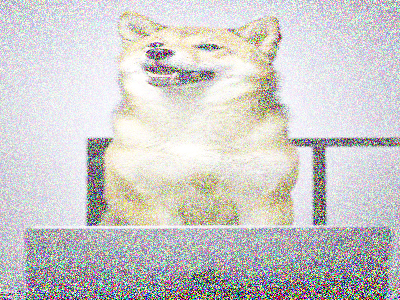

filtered_salt_and_pepper


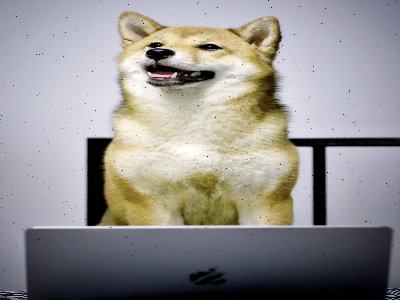

filtered_gaussian


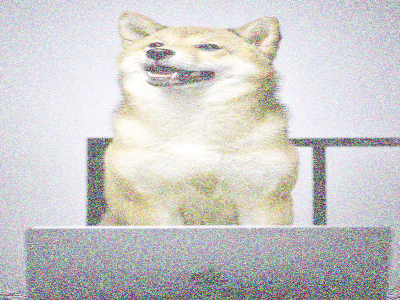

In [4]:
# Load the image
image = cv2.imread(dog)

# Add salt and pepper noise
salt_and_pepper_noisy_image = add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02)

# Add Gaussian noise
gaussian_noisy_image = add_gaussian_noise(image)

# finding the best kernal size
best_kernel_size = kernal_serach(salt_and_pepper_noisy_image,gaussian_noisy_image,image)

# Remove noise using filters
filtered_salt_and_pepper = remove_noise(salt_and_pepper_noisy_image, filter_type='median', kernel_size=best_kernel_size)
filtered_gaussian = remove_noise(gaussian_noisy_image, filter_type='gaussian', kernel_size=best_kernel_size)

# Display the noisy and filtered images (resized)
print('Raw image')
cv2_imshow( cv2.resize(image, (400, 300)))
print('salt_and_pepper_noisy_image')
cv2_imshow( cv2.resize(salt_and_pepper_noisy_image, (400, 300)))
print('gaussian_noisy_image')
cv2_imshow(cv2.resize(gaussian_noisy_image, (400, 300)))
print('filtered_salt_and_pepper')
cv2_imshow(cv2.resize(filtered_salt_and_pepper, (400, 300)))
print('filtered_gaussian')
cv2_imshow(cv2.resize(filtered_gaussian, (400, 300)))
cv2.waitKey(0)
cv2.destroyAllWindows()

The key difference between salt and pepper noise and Gaussian noise is the nature of the noise:

    Salt and pepper noise adds random white and black pixels to the image, simulating sharp, isolated, and extreme noise.
    Gaussian noise adds random values from a Gaussian distribution to the pixel values, creating a smoother and more continuous form of noise.

The filters used for noise removal in this code are:

    Gaussian blur (cv2.GaussianBlur): It applies a Gaussian filter to the image, which smooths out the noise by averaging pixel values in a local neighborhood.
    Median filter (cv2.medianBlur): It replaces each pixel's value with the median value of pixels in a specified neighborhood.

Q2. Take the following images and blur them using:
1. Gaussian blur
2. Motion Blur
Then display the images and the kernel used to blur them. Explain both blurring techniques in
detail. After that de-blur those images with the help of that kernel and display the results.

In [5]:
import cv2
import numpy as np

# Load the image
image = cv2.imread(street)

# Define the kernel size for Gaussian blur
gaussian_kernel_size = (15, 15)

# Define the standard deviation for Gaussian blur
gaussian_sigma_x = 0

# Apply Gaussian blur
blurred_gaussian = cv2.GaussianBlur(image, gaussian_kernel_size, gaussian_sigma_x)

# Define the size and angle for motion blur
motion_kernel_size = 15
motion_angle = 45  # Angle in degrees

# Create a motion blur kernel
motion_kernel = np.zeros((motion_kernel_size, motion_kernel_size))
motion_kernel[int((motion_kernel_size-1)/2), :] = np.ones(motion_kernel_size)
motion_kernel = motion_kernel / motion_kernel_size

# Apply motion blur
motion_blur = cv2.filter2D(image, -1, motion_kernel)

# Display the original image and blurred images
cv2_imshow(cv2.resize(image, (500, 500)))
cv2_imshow(cv2.resize(blurred_gaussian, (500, 500)))
cv2_imshow(cv2.resize(motion_blur, (500, 500)))

# Define the kernel for deblurring (use the same kernel size and angle)
deblur_kernel = np.transpose(motion_kernel)

# Deblur the blurred images
deblurred_gaussian = cv2.filter2D(blurred_gaussian, -1, deblur_kernel)
deblurred_motion = cv2.filter2D(motion_blur, -1, deblur_kernel)

# Display the deblurred images
cv2_imshow(cv2.resize(deblurred_gaussian, (500, 500)))
cv2_imshow(cv2.resize(deblurred_motion, (500, 500)))

cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

Q3. From the below-given images take the image of a dog and place it on the road in the city
image. Do necessary scaling and apply proper geometric transformations. Explain the steps
in detail. Display the resulting image.

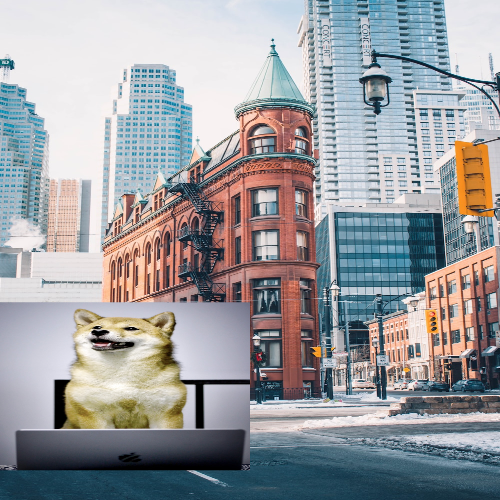

In [6]:
import cv2
import numpy as np

# Load the road image and dog image
road_image = cv2.imread(street)  # Replace with your road image file path
dog_image = cv2.imread(dog)    # Replace with your dog image file path
dog_image = cv2.resize(dog_image, (500, 500))

# Define the coordinates to place the dog image (100, 1300)
x_offset, y_offset = 900, 300

# Get the height and width of the dog image
dog_height, dog_width, _ = dog_image.shape

# Calculate the dimensions of the ROI
roi_height, roi_width = min(dog_height, road_image.shape[0] - x_offset), min(dog_width, road_image.shape[1] - y_offset)

# Crop the dog image to match the dimensions of the ROI
dog_image = dog_image[:roi_height, :roi_width]

# Place the dog image onto the road image at the specified coordinates
road_image[x_offset:x_offset + roi_height, 0:500] = dog_image

alpha = 0.5  # Adjust the alpha value for blending
cv2.addWeighted(road_image, alpha, road_image, 1 - alpha, 0, road_image)


# Display the resulting image
cv2_imshow(cv2.resize(road_image, (500, 500)))
cv2.waitKey(0)
cv2.destroyAllWindows()